n =  0  mode contributes more than 10%
n =  1  mode contributes more than 10%
n =  2  mode contributes more than 10%
n =  3  mode contributes more than 10%
n =  4  mode contributes more than 10%
n =  5  mode contributes more than 10%
n =  6  mode contributes more than 10%
n =  7  mode contributes more than 10%
n =  8  mode contributes more than 10%
n =  9  mode contributes more than 10%
n =  10  mode contributes more than 10%
n =  11  mode contributes more than 10%
n =  12  mode contributes more than 10%
n =  13  mode contributes more than 10%
n =  14  mode contributes more than 10%
n =  15  mode contributes more than 10%
n =  986  mode contributes more than 10%
n =  987  mode contributes more than 10%
n =  988  mode contributes more than 10%
n =  989  mode contributes more than 10%
n =  990  mode contributes more than 10%
n =  991  mode contributes more than 10%
n =  992  mode contributes more than 10%
n =  993  mode contributes more than 10%
n =  994  mode contributes more than 10%
n

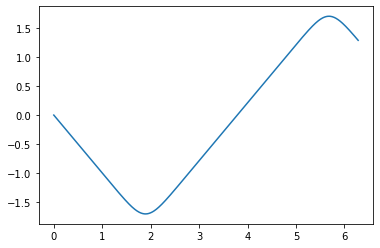

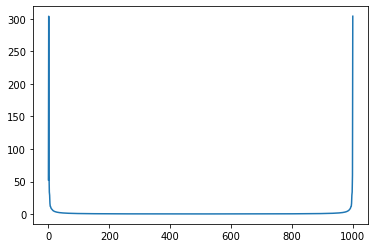

/tmp/ipykernel_541/2356073802.py:101: ComplexWarning: Casting complex values to real discards the imaginary part
  invsignal[n] = zsum / sq2pi / N


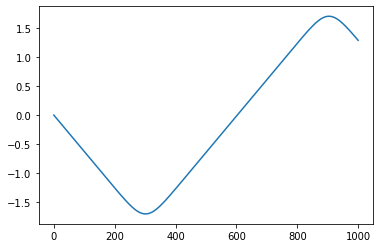

In [30]:
#1
#Nonlinear oscillator taken from lecture 13

#Worked extensively with Abigail on this one

import matplotlib.pylab as p
import numpy as np

#   Initialization
a = 0.
b = 6.2832
n = 1000                                         
ydumb = np.zeros((2), float);    y = np.zeros((2), float)
fReturn = np.zeros((2), float);  k1 = np.zeros((2), float)
k2 = np.zeros((2), float);       k3 = np.zeros((2), float) 
k4 = np.zeros((2), float)
y[0] = 0.;   y[1] = -1.
t = a;       h = (b-a)/n;
xp=np.array([0.0])
yp=np.array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]
    fReturn[1] =-.01* y[0]**11 #Set to given power
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
        k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=np.append(xp, t)
    yp=np.append(yp,y[0])
    
p.plot(xp,yp)


#xp,yp represent discretized function for one period

#for fourier purposes, xp is our time coordinate
import matplotlib.pyplot as plt
import cmath

N = len(xp);                  
Np = N                                
twopi  = 2.*np.pi;       
sq2pi = 1./np.sqrt(twopi);         
h = twopi/N
dftz   = np.zeros( (Np), complex )                  # Complex elements
xa = np.zeros( (N+1), float )   
nplot = np.zeros( N, float )   
fplot = np.zeros( N, float ) 

def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += yp[k]*np.exp(-zexpo)        # finish this line
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = np.sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)
      if fplot[n]/fplot[0]>.1:
            print('n = ',n,' mode contributes more than 10%')
fourier(dftz)              # Call signal, transform

plt.show()
plt.plot(nplot,fplot)
plt.show()

#inverse fourier transform, taken from lect 14
fplot2 = np.zeros( N, float ) 
invsignal = np.zeros( N,float)
def invfourier(invsignal):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += dftz[k]*np.exp(zexpo)           
      invsignal[n] = zsum / sq2pi / N     
      fplot2[n] = np.sqrt(invsignal[n].imag*invsignal[n].imag+invsignal[n].real*invsignal[n].real)
       
invfourier(invsignal)
plt.plot(nplot,invsignal.real)

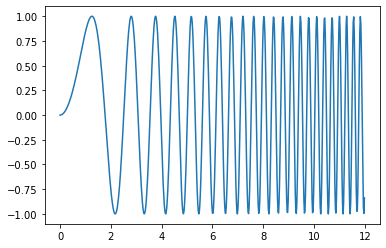

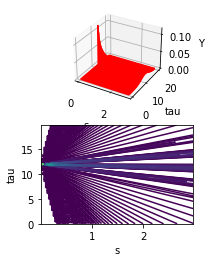

In [31]:
#2
#taken from lecture 15

import matplotlib.pyplot as plt
from numpy import *
 
ns=100
ntau=300
dstep=3./ns
sar=arange(0.001,3.001,dstep)  # s array
dtaustep=20./ntau
tauar=arange(0.,20.,dtaustep) # tau array
ystau=zeros((ns, ntau),complex)

nt=600
dtstep=12./nt
tar=arange(0.,12.,dtstep)

def func(t): #in line with requested function
    if 0<t<15:
        return np.sin(t**2)
    else:
        return 0

def morlet(t,sigma):
    psi=exp(2.*pi*t*1j)*exp(-t*t/2./sigma/sigma)
    return psi

yarr=zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=func(tar[idext]) # y(t) for all t_i
    for idexs in range(ns):
        for idextau in range(ntau):
            for idext in range(nt):   # For each s and tau, integrate t for the wavelet transform
                #ystau[idexs,idextau] += yarr[idext] * dstep * 1/sqrt(idexs) *conjugate(morlet((tar[idext]-tauar[idextau])/sar[idexs],1.))
                ystau[idexs,idextau] = sum(conjugate(morlet((tar[idext]-tauar[idextau])/sar[idexs],1.))*yarr[idext]*dstep/sqrt(sar[idexs]))
                
wavelet()


#graphing
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pylab  as p   
#ax = fig.add_subplot(1,1,1,projection='3d')

fig = p.figure()                                    # Create figure
#ax = Axes3D(fig) 
p.plot(tar,yarr)
fig = p.figure()  
ax = fig.add_subplot(2,2,1,projection='3d')
X, Y = p.meshgrid(sar, tauar) 
ax.plot_surface(X, Y, abs(transpose(ystau)))                            # Surface
ax.plot_wireframe(X, Y, abs(transpose(ystau)), color = 'r')               # Add wireframe
ax.set_xlabel('s')
ax.set_ylabel('tau')
ax.set_zlabel('Y')
ax = fig.add_subplot(2,2,3)
levels=p.arange(abs(transpose(ystau)).min(),abs(transpose(ystau)).max(),(abs(transpose(ystau)).max() - abs(transpose(ystau)).min())/100.)
CS=p.contour(sar,tauar,transpose(ystau).imag, levels=levels)
p.xlabel('s')
p.ylabel('tau')
p.show()
p.show()  